In [1]:
import matplotlib.pyplot as plt
import numpy  as np
import glob
import cv2
import pandas as pd
from matplotlib.colors import LogNorm

import h5py
import os

from PIL import Image
from IPython.display import Video
from IPython.display import HTML
from ipywidgets import Video
from scipy import stats
from scipy.fft import fft, ifft, fftfreq

### **The goal of this code is to analyze the dataset for an n-times on-off cycle**

## 1. Plot Current

In this code, we will measure the current of the cell.
1. Response of current to time(frame)
2. Graph of current to offset(voltage)

In [3]:
fold_num   = 'm087'
path       = f"F:/William/20220412/{fold_num}/waveforms/0/data_0/acq_"
files      = len(glob.glob(f"F:/William/20220412/{fold_num}/waveforms/0/data_0/acq_*.csv"))
current    = []
voltage    = []
amplifier  = 10**5
for i in range(files):
    file   = open(path + f"{i}" + ".csv")
    df     = pd.read_csv(file, sep=',', comment='#', index_col=False)
    v_out  = df['0']
    voltage.append(v_out)
    curr   = v_out/amplifier #convert voltage to ampere
    current.append(curr)

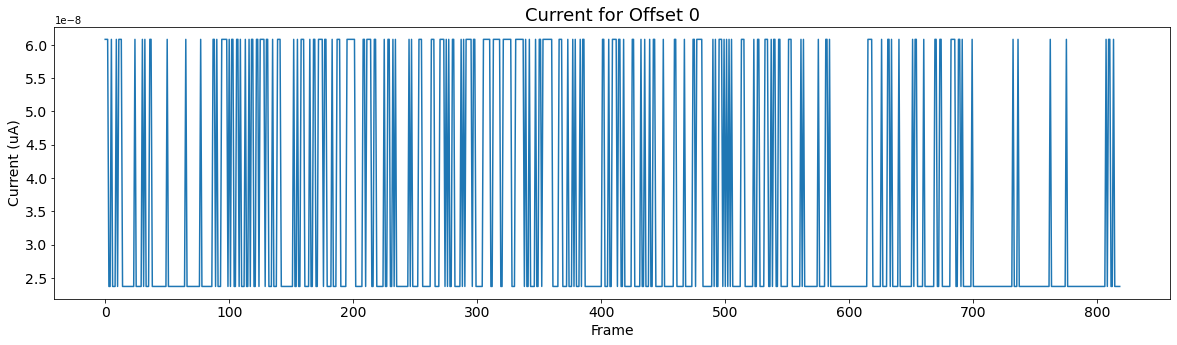

In [4]:
plt.figure(figsize=(20, 5))
plt.plot(np.array(current).flatten()[:int(8192*0.1)])
plt.title('Current for Offset 0', fontsize=18)
plt.ylabel('Current (uA)', fontsize=14)
plt.xlabel('Frame', fontsize=14)
plt.tick_params(labelsize=14)

In [5]:
def curr(numfile, run):
    global current
    current    = []
    for t in range(0,10):
        path       = f"F:/William/20220412/{numfile}/waveforms/{run}/data_{t}/acq_"
        files      = len(glob.glob(f"F:/William/20220412/{numfile}/waveforms/data_0/acq_*.csv"))   
        voltage    = []
        amplifier  = 10**5
        v_out      = 0
        for i in range(files):
            file   = open(path + f"{i}" + ".csv")
            df     = pd.read_csv(file, sep=',', comment='#', index_col=False)
            v_out  += df['0']
        volt = np.mean(np.array(v_out/amplifier))
        current.append(volt)

In [6]:
# For one measurement
num_fold = 'm087'
curr(num_fold,'0')
curr_1 = current
curr(num_fold,'1')
curr_2 = current
curr(num_fold,'2')
curr_3 = current
curr(num_fold,'3')
curr_4 = current
curr(num_fold,'4')
curr_5 = current
curr(num_fold,'5')
curr_6 = current

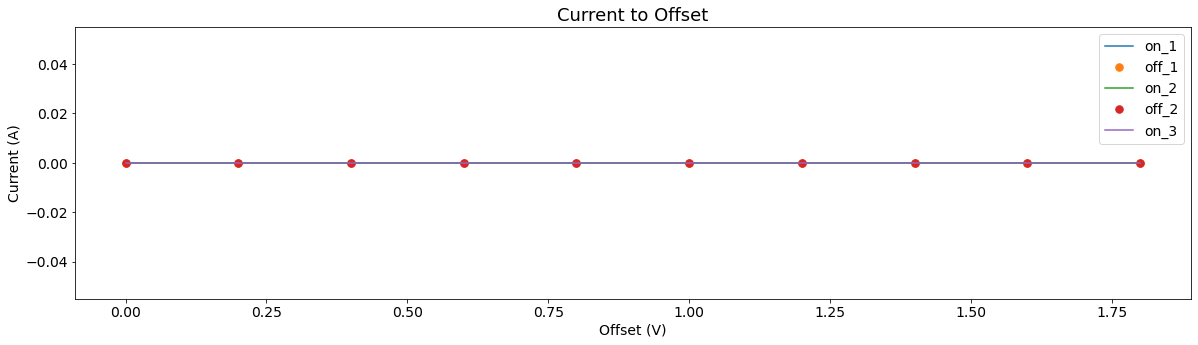

In [7]:
plt.figure(figsize=(20, 5))
plt.plot([x * 0.2 for x in range(0, 10)],curr_1, '-', markersize=15, label="on_1")
plt.plot([x * 0.2 for x in range(0, 10)],curr_2, '.', markersize=15, label="off_1")
plt.plot([x * 0.2 for x in range(0, 10)],curr_3, '-', markersize=15, label="on_2")
plt.plot([x * 0.2 for x in range(0, 10)],curr_4, '.', markersize=15, label="off_2")
plt.plot([x * 0.2 for x in range(0, 10)],curr_5, '-', markersize=15, label="on_3")
plt.plot([x * 0.2 for x in range(0, 10)],curr_6, '.', markersize=15, label="off_3")
plt.title('Current to Offset', fontsize=18)
plt.ylabel('Current (A)', fontsize=14)
plt.xlabel('Offset (V)', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize=14)

## 2. Plot Variance to Offset

Then, we plot the graph of variance of images against the offset.

In [10]:
def variance(numfile, run):
    # n = list(range(15,40,5)) #to call the data, based on their offset
    global var_all, var
    n = list(range(0,10))
    var_list = []
    var_all  = []
    for i in range(len(n)):
        base_file   = h5py.File(f'E:/William/20220412/{numfile}/basler/{run}/data_{n[i]}.hdf5', 'r') #call the hdf5 file
        for j in range(len(base_file)):
            dt_set  = np.array(base_file[f"{j}"][:]) #call dataset
            var     = np.var(dt_set, axis=2) #variance to all array for each dataset
            var_pix = var[82:85,267:272] # choose the region of interest
            var_list.append(var_pix)
        var_avg = np.mean(np.array(var_list))
        var_all.append(var_avg)

In [11]:
# For one measurement
num_folder = 'm087'
variance(num_folder,'0')
var_0 = var_all
variance(num_folder,'1')
var_1 = var_all
variance(num_folder,'2')
var_2 = var_all
variance(num_folder,'3')
var_3 = var_all
variance(num_folder,'4')
var_4 = var_all
variance(num_folder,'5')
var_5 = var_all

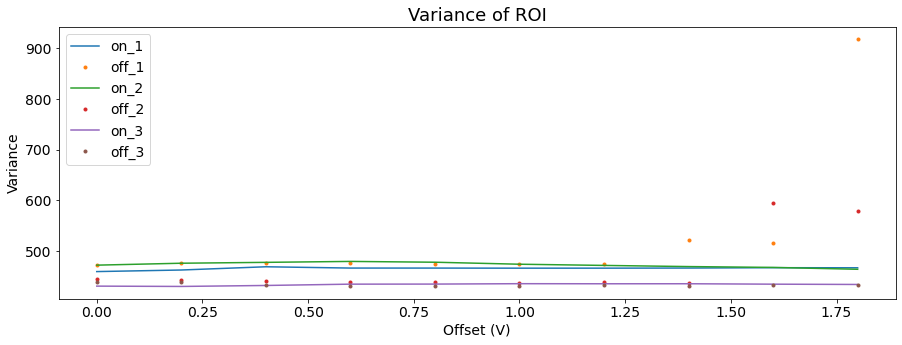

In [12]:
plt.figure(figsize=(15, 5))
plt.plot([x * 0.2 for x in range(0, 10)], var_0, '-', label="on_1")
plt.plot([x * 0.2 for x in range(0, 10)], var_1, '.', label="off_1")
plt.plot([x * 0.2 for x in range(0, 10)], var_2, '-', label="on_2")
plt.plot([x * 0.2 for x in range(0, 10)], var_3, '.', label="off_2")
plt.plot([x * 0.2 for x in range(0, 10)], var_4, '-', label="on_3")
plt.plot([x * 0.2 for x in range(0, 10)], var_5, '.', label="off_3")

plt.xlabel("Offset (V)", fontsize=14)
plt.ylabel("Variance", fontsize=14)
plt.title("Variance of ROI", fontsize=18)
plt.legend(fontsize=14)
plt.tick_params(labelsize=14)

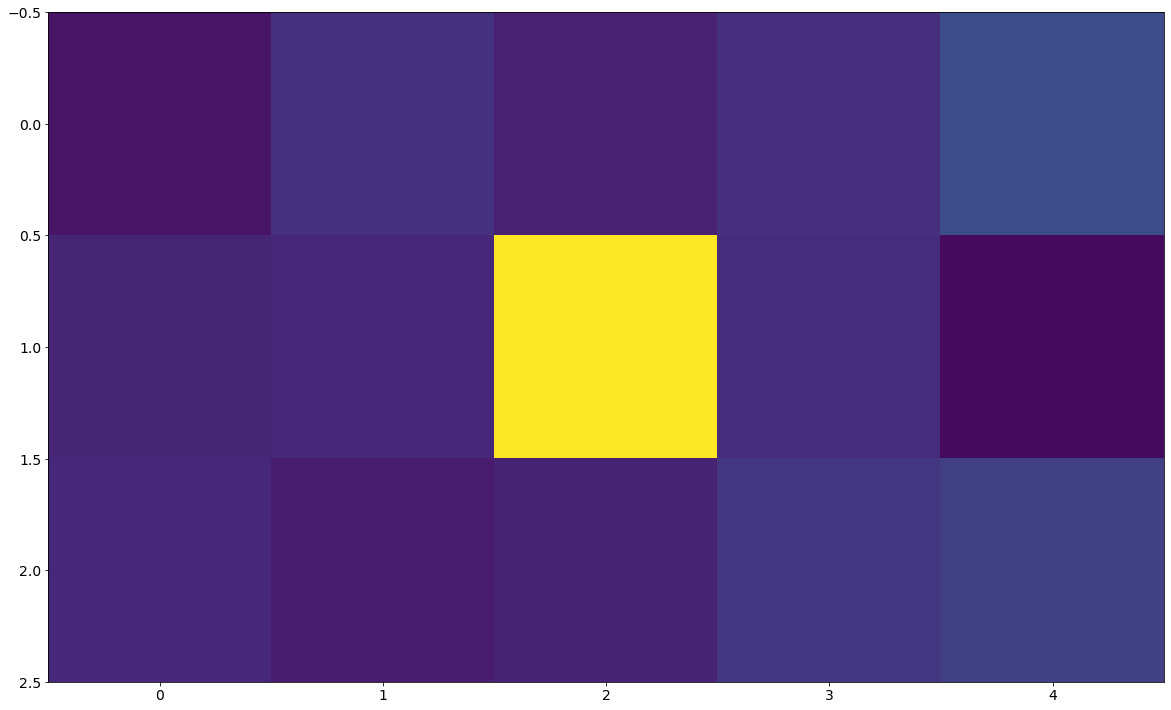

In [1109]:
plt.figure(figsize=(20,20))
spot = 'F:/William/20220412/m087/image/variance/data_9/im__0037.bmp'
a = np.array(Image.open(spot))
plt.imshow(a)
plt.tick_params(labelsize=14)
# plt.show()
plt.imshow(a[82:85,267:272])

## 3. Create Image and Video

Then, we create images and video of variances.

In [ ]:
# IMAGE BMP MAKER (NO COLOURBAR)

folder_number = "m087"
run = list(range(0,5))
n = list(range(0,10))
layer = 50
for runs in run:
    for f in n:
        base_file   = h5py.File(f'F:/William/20220412/{folder_number}/basler/{runs}/data_{f}.hdf5', 'r') #call the hdf5 file
        ar = []
        var = []
        for i in range(len(base_file)):
            dt_set  = (base_file[f'{i}']) #call dataset
            for j in range(layer):
                ar.append(dt_set[:,:,j])
            data = np.var(np.array(ar), axis = 0)  
            avg  = np.mean(np.array(ar), axis = 0)
            plt.imsave(f"F:/William/20220412/{folder_number}/image/variance/{runs}/data_{f}/im__{i:04}.bmp", data)
            plt.imsave(f"F:/William/20220412/{folder_number}/image/average/{runs}/data_{f}/im__{i:04}.bmp", avg)

In [14]:
# this function is to produce image with colorbar and save it to certain folder
def image(data, type, folder_number, i): #type= "variance" or "average"
    fig, ax1 = plt.subplots(1,1)
    im = ax1.imshow(data, norm=LogNorm(vmin=1,vmax=2000), interpolation='nearest')
    cb = plt.colorbar(im)

    fg_color = 'white'
    bg_color = 'black'

    # IMSHOW    
    # set title plus title color
    ax1.set_title(f'Run = {runs}, data_{n[f]}, Offset = {f*0.2} V', color=bg_color)

    # set figure facecolor
    ax1.patch.set_facecolor(bg_color)

    # set tick and ticklabel color
    im.axes.tick_params(color=fg_color, labelcolor=bg_color)

    # set imshow outline
    for spine in im.axes.spines.values():
        spine.set_edgecolor(fg_color)    

    # COLORBAR
    # set colorbar tick color
    cb.ax.yaxis.set_tick_params(color=bg_color)
    
    # set colorbar edgecolor 
    cb.outline.set_edgecolor(bg_color)

    # set colorbar ticklabels
    plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color=bg_color)

    #         fig.patch.set_facecolor(bg_color)    
    #         plt.tight_layout()
    plt.savefig(f"F:/William/20220412/{folder_number}/image/{type}/Run {runs} - data_{n[f]}.jpg", dpi=400)
#     plt.show()

In [ ]:
# IMAGE MAKER FOR ROI AND COLOURBAR

folder_number = 'm087'
run = list(range(0,6))
n   = list(range(0,10))
s   = 0
for runs in run:
    for f in n: #dataset
        base_file   = h5py.File(f'F:/William/20220412/{folder_number}/basler/{runs}/data_{n[f]}.hdf5', 'r') #call the hdf5 file
        var = []
        ar  = []
        for i in range(len(base_file)): #cycles in dataset
            dt_set  = (base_file[f'{i}']) #call cycles
            for j in range(len(base_file)): #array in cycles
                ar.append(dt_set[:,:,j])
        
#         plt.imshow(var_data)
#         plt.title(f'Variance for data_{f}')
#             var  = np.var(data)
#             image(var, 'variance', folder_number, s) 
#             s   += 1

In [ ]:
# AVERAGE IMAGE FOR EACH DATA AND RUN

folder_number = 'm087'
run = list(range(0,6))
n   = list(range(0,10))
s   = 0
for runs in run:
    for f in n: #dataset
        base_file   = h5py.File(f'F:/William/20220412/{folder_number}/basler/{runs}/data_{n[f]}.hdf5', 'r') #call the hdf5 file
        var = []
        ar  = []
        for i in range(len(base_file)): #cycles in dataset
            dt_set  = (base_file[f'{i}']) #call cycles
            for j in range(len(base_file)): #array in cycles
                ar.append(dt_set[:,:,j])
                
            data = np.var(np.array(ar), axis = 0) 
            avg  = np.mean(np.array(ar), axis = 0)
            var.append(data)
        
        avg_data = np.mean(np.array(var), axis = 0) 
        plt.imsave(f"F:/William/20220412/{folder_number}/image/ROI2/Run {runs} - data_{n[f]}.bmp", avg_data)

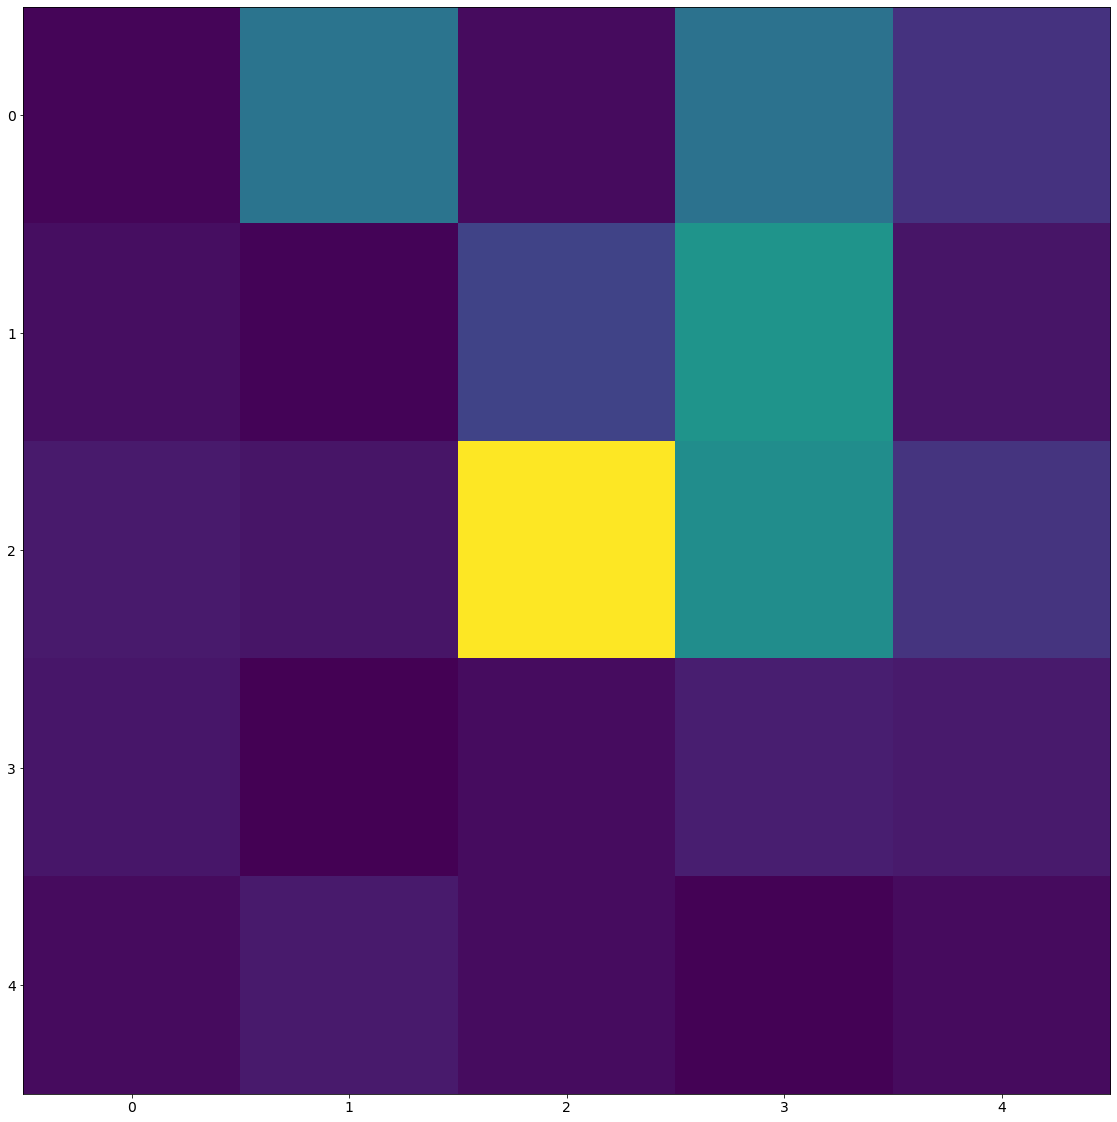

In [226]:
# Averaged image ROI selection
# n   = list(range(0,10))
# for f in n:
spot = f'F:/William/20220412/m087/image/ROI2/Run 5 - data_1.bmp'
plt.figure(figsize=(20,20))
a = np.array(Image.open(spot))
plt.imshow(a)
plt.tick_params(labelsize=14)
#     plt.show()
plt.imshow(a[70:75,270:275])

In [102]:
# VIDEO FOR BMP FILES

def video(fold_num, run, types): #types: average or variance
    n = list(range(0,10))
    for f in n:
        folder = f"F:/William/20220412/{fold_num}/movie/video_{f}.avi"
        img_array = []
        for filename in glob.glob(f'F:/William/20220412/{fold_num}/image/ROI2/*.bmp'):
            img = cv2.imread(filename)
            height, width, layer = img.shape
            size = (width,height)
            img_array.append(img)

            out = cv2.VideoWriter(folder, cv2.VideoWriter_fourcc(*'DIVX'),3,size)

        for k in range(len(img_array)):
            out.write(img_array[k])
            out.release

In [103]:
for runs in run:
#     video(f'{folder_number}', f'{runs}', 'average')
    video(f'{folder_number}', f'{runs}', 'variance')

In [3]:
# VIDEO FOR ROI

def video(fold_num): #types: average or variance
    n = list(range(0,10))
    folder = f"F:/William/20220412/{fold_num}/movie/video3.mp4"
    file_list   = glob.glob(f'F:/William/20220412/{fold_num}/image/variance/*.jpg')
    img_array = []
    filtered_img_array = list(filter(None, img_array))
    for filename in range(1001,1500):  #len(file_list)):
        img = cv2.imread(f'F:/William/20220412/{fold_num}/image/variance/im__{filename}.jpg')
        height, width, layer = img.shape
        size = (width,height)
        img_array.append(img)

    out = cv2.VideoWriter(folder, cv2.VideoWriter_fourcc(*'DIVX'),3,size)

    for k in range(len(filtered_img_array)):
        out.write(filtered_img_array[k])
    out.release

In [4]:
video(f'm087')

## Intensity Profile

This code is aimed to plot the intensity profile of images for all cycles

In [200]:
# -*- coding: utf-8 -*-
"""
Created on Thu Mar  3 13:19:09 2022

@author: Sjoerd Quaak

The aim of this script is to read the HDF5 files, play the movie and make an intensity plot
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import FFMpegWriter
import h5py

#Function to read hdf5 files
def video(numfile, a, b, c, d): #a,b is the range of y coordinate  &  c,d is the range of x coordinate
    # n = list(range(15,40,5)) #to call the data, based on their offset
    global dt_set_list, dt_set
    n   = list(range(0,10))
    run = list(range(0,6))
    dt_set_list = []
    for runs in run:
        for f in n:
            base_file   = h5py.File(f'F:/William/20220412/{numfile}/basler/{runs}/data_{n[f]}.hdf5', 'r') #call the hdf5 file
            for j in range(len(base_file)): #j= dataset name
                dt_set  = np.array(base_file[f"{j}"][:]) #call dataset
                for k in range(dt_set.shape[2]):
                    imgs = dt_set[a:b,c:d,k] #-dt_set[:,:,0]
                    dt_set_list.append(imgs[:,:])
        print(f"Run = {runs}")

In [281]:
# Create intensity of all images
#Now, let's make a movie dataset
def create_movie(b, imgx, x_axis, x, y): #x is the half value of c,d coordinate  &  y is the half value of a,b coordinate
    global intensity, minute_list
    movie = b
    img = movie[:,:,6]

    h = img.shape[0]
    w = img.shape[1]

    img_cut    = img[:,:]
    plt.figure()
    plt.figure(figsize = (25, 5))
    imgcutplot = plt.imshow(img_cut)
    plt.imshow(imgx)
    plt.scatter(x, y, s = 120, marker = "s", edgecolors = "red", linewidths = 2, alpha = 1, color='none') 
   
    #Or play the movie with the borders cut:
    #Call the function in the console
    def execute_movie_cut():

        fig  = plt.figure()
        axis = plt.axes()
        film = plt.imshow(movie[:,:,0])

        def init():
            film.set_data(movie[:,:,0])
            return [film]

        def animate(i):
            film.set_array(movie[:,:,i])
            return [film]

        fig.suptitle(f'ROI: x[{x-2}:{x+3}] and y[{y-2}:{y+3}]')
        plt.colorbar()
        anim = FuncAnimation(fig, animate, init_func = init,
                             frames = movie.shape[2], interval = 20, blit = True)
        return anim

    execute_movie_cut()
    intensity   = np.zeros((movie.shape[2]))
    minute_list = np.linspace(0,x_axis,movie.shape[2])  ##define time
    for i in range(movie.shape[2]):
        intensity[i] = sum(sum(movie[:,:,i]))

In [202]:
#a,b is the range of y coordinate  &  c,d is the range of x coordinate
video(numfile = "m087", a=47, b=52, c=243, d=248)
a0   = np.swapaxes(dt_set_list, axis1=0, axis2=2)
b0   = np.swapaxes(a0, axis1=0, axis2=1)
img0 = dt_set[:,:,0]

Run = 0
Run = 1
Run = 2
Run = 3
Run = 4
Run = 5


In [208]:
video(numfile = "m087", a=105, b=110, c=200, d=205)
a1   = np.swapaxes(dt_set_list, axis1=0, axis2=2)
b1   = np.swapaxes(a1, axis1=0, axis2=1)
img1 = dt_set[:,:,0]

Run = 0
Run = 1
Run = 2
Run = 3
Run = 4
Run = 5


In [211]:
video(numfile = "m087", a=87, b=92, c=205, d=210)
a2   = np.swapaxes(dt_set_list, axis1=0, axis2=2)
b2   = np.swapaxes(a2, axis1=0, axis2=1)
img2 = dt_set[:,:,0]

Run = 0
Run = 1
Run = 2
Run = 3
Run = 4
Run = 5


In [215]:
video(numfile = "m087", a=82, b=87, c=271, d=276)
a3   = np.swapaxes(dt_set_list, axis1=0, axis2=2)
b3   = np.swapaxes(a3, axis1=0, axis2=1)
img3 = dt_set[:,:,0]

Run = 0
Run = 1
Run = 2
Run = 3
Run = 4
Run = 5


In [218]:
video(numfile = "m087", a=180, b=185, c=187, d=192)
a4   = np.swapaxes(dt_set_list, axis1=0, axis2=2)
b4   = np.swapaxes(a4, axis1=0, axis2=1)
img4 = dt_set[:,:,0]

Run = 0
Run = 1
Run = 2
Run = 3
Run = 4
Run = 5


In [227]:
video(numfile = "m087", a=70, b=75, c=270, d=275)
a5   = np.swapaxes(dt_set_list, axis1=0, axis2=2)
b5   = np.swapaxes(a5, axis1=0, axis2=1)
img5 = dt_set[:,:,0]

Run = 0
Run = 1
Run = 2
Run = 3
Run = 4
Run = 5


<Figure size 432x288 with 0 Axes>

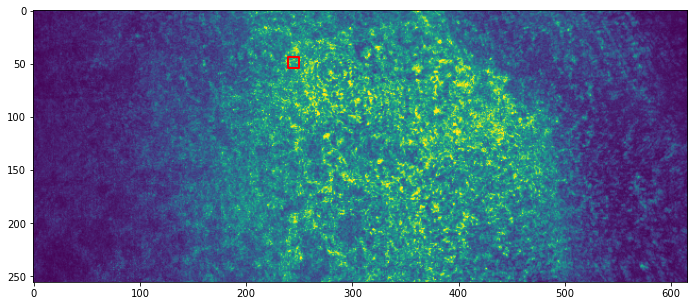

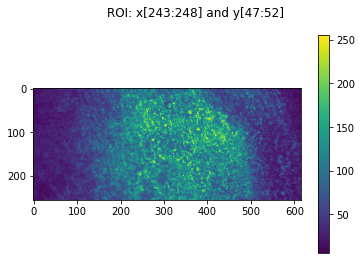

<Figure size 432x288 with 0 Axes>

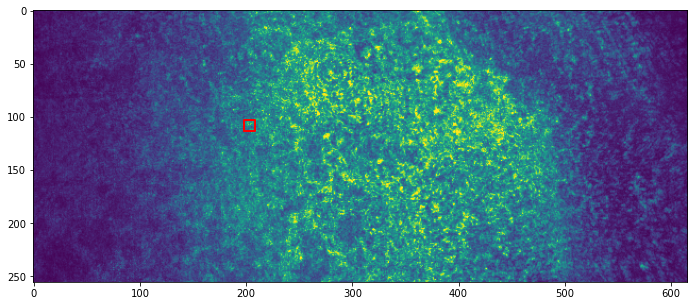

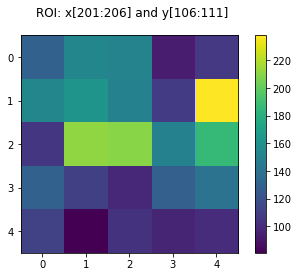

<Figure size 432x288 with 0 Axes>

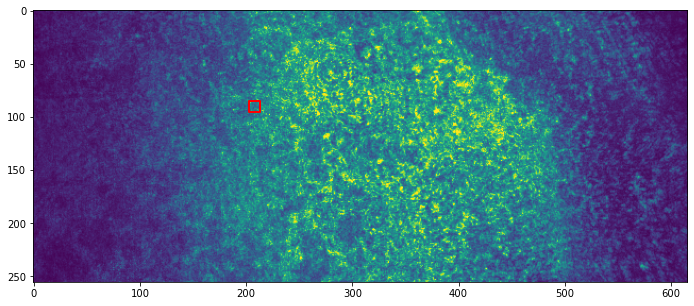

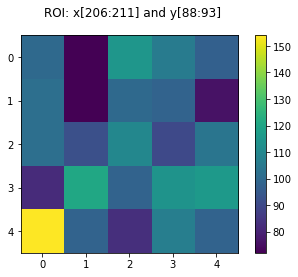

<Figure size 432x288 with 0 Axes>

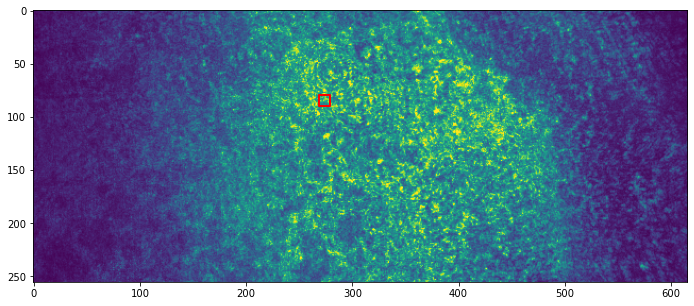

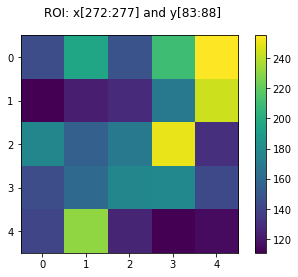

<Figure size 432x288 with 0 Axes>

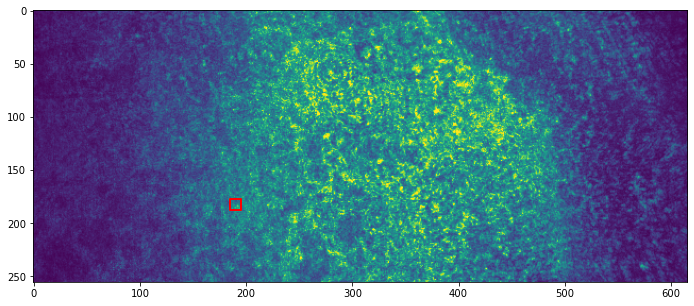

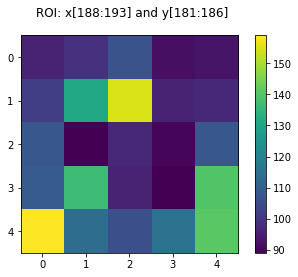

<Figure size 432x288 with 0 Axes>

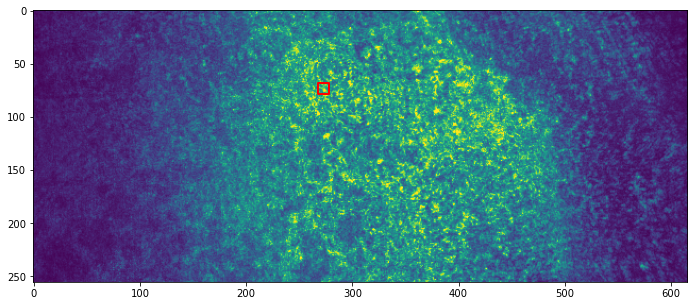

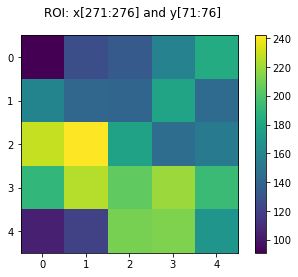

In [282]:
#x is the half value of c,d coordinate  &  y is the half value of a,b coordinate
create_movie(b0, img0, 4500, x=245, y=49)
I0 = intensity/1000
create_movie(b1, img1, 4500, x=203, y=108)
I1 = intensity/1000
create_movie(b2, img2, 4500, x=208, y=90)
I2 = intensity/1000
create_movie(b3, img3, 4500, x=274, y=85)
I3 = intensity/1000
create_movie(b4, img4, 4500, x=190, y=183)
I4 = intensity/1000
create_movie(b5, img5, 4500, x=273, y=73)
I5 = intensity/1000

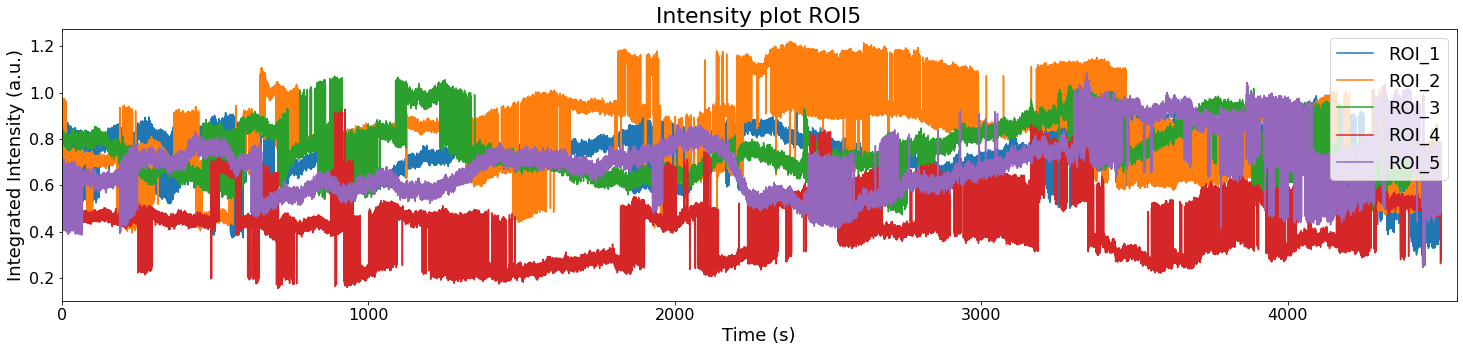

In [276]:
plt.figure(figsize = (25, 5))
plt.plot(minute_list, I1, label = "ROI_1")
plt.plot(minute_list, I2, label = "ROI_2")
plt.plot(minute_list, I3, label = "ROI_3")
plt.plot(minute_list, I4, label = "ROI_4")
plt.plot(minute_list, I5, label = "ROI_5")
plt.title('Intensity plot ROI5', fontsize=22)
plt.xlabel("Time (s)", fontsize=18)
plt.xlim(-0.5,4550)
plt.tick_params(labelsize=16)
plt.ylabel("Integrated Intensity (a.u.)", fontsize=18)
plt.legend(fontsize=18)
#%%#%%

C:\Users\nano\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


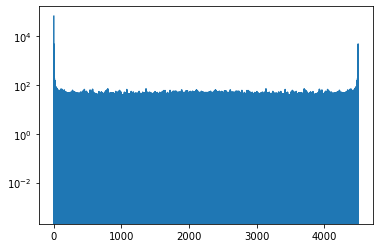

C:\Users\nano\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


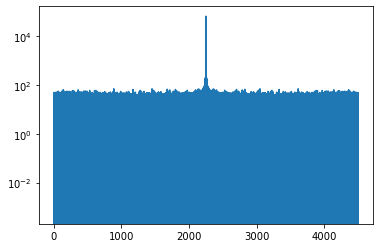

In [267]:
FFT_intensity = np.fft.fft(I4[:])
FFT_intensity_2 = np.fft.fftshift(np.fft.fft(I5[:]))

# plt.plot(np.abs(FFT_intensity)**2)
# plt.show()
plt.plot(minute_list[:], FFT_intensity[:])  #.flatten()[:int(8192*0.1)])
plt.yscale("log")
plt.show()
plt.plot(minute_list[:], FFT_intensity_2[:])   #.flatten()[:int(8192*0.1)])
plt.yscale("log")
plt.show()
# plt.plot(minute_list[:], FFT_intensity[:])
# plt.margins(x=0, y=0)
# plt.show()
# ax3 = plt.subplot(222)
# ax3.margins(x=0, y=-0.25)   # Values in (-0.5, 0.0) zooms in to center
# ax3.plot(t1, f(t1))
# ax3.set_title('Zoomed in')

# plt.show()

In [214]:
# For FFT
#Function to read hdf5 files
def video(numfile, a, b, c, d): #a,b is the range of y coordinate  &  c,d is the range of x coordinate
    # n = list(range(15,40,5)) #to call the data, based on their offset
    global dt_set_list, dt_set
    n   = list(range(0,10))
    run = list(range(0,6))
    dt_set_list = []
    for runs in run:
        for f in n:
            base_file   = h5py.File(f'F:/William/20220412/{numfile}/basler/{runs}/data_{n[f]}.hdf5', 'r') #call the hdf5 file
            for j in range(len(base_file)): #j= dataset name
                dt_set  = np.array(base_file[f"{j}"][:]) #call dataset
                for k in range(dt_set.shape[2]):
                    plt.imshow(dt_set[:,:,k])
                    plt.show()
#                     imgs = np.abs(np.fft.fftshift(np.fft.fft(dt_set[a:b,c:d,k])))**2 #-dt_set[:,:,0]
                    imgs = np.fft.fftshift((dt_set[:,:,k])) #-dt_set[:,:,0]
#                     imgs = np.abs(np.fft.fft2(dt_set[:,:,k]))**2
        print(f"Run = {runs}")
    plt.imshow(np.abs(imgs)**2
    plt.show()
#     plt.imshow(imgs_2)
#     plt.show()

SyntaxError: invalid syntax (<ipython-input-214-205ae0d0bb51>, line 22)

Run = 2


<Figure size 432x288 with 0 Axes>

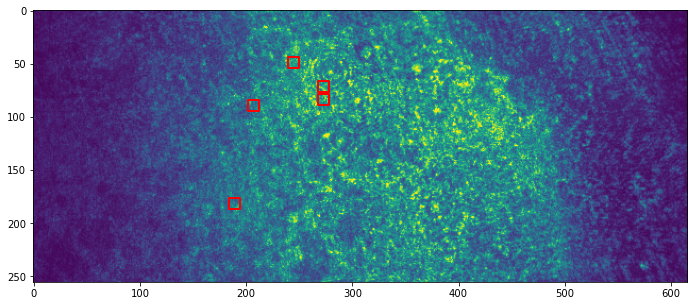

In [283]:
n   = list(range(0,10))
run = list(range(0,6))
dt_set_list = []
# for runs in run:
for f in n:
    base_file   = h5py.File(f'F:/William/20220412/m087/basler/0/data_0.hdf5', 'r') #call the hdf5 file
    for j in range(len(base_file)): #j= dataset name
        dt_set  = np.array(base_file[f"{j}"][:]) #call dataset
        for k in range(dt_set.shape[2]):
            imgs = dt_set[:,:,0] #-dt_set[:,:,0]
            dt_set_list.append(imgs[:,:])
print(f"Run = {runs}")

a   = np.swapaxes(dt_set_list, axis1=0, axis2=2)
b   = np.swapaxes(a, axis1=0, axis2=1)

movie = b
img   = movie[:,:,6]

h = img.shape[0]
w = img.shape[1]

img_cut    = img[:,:]
plt.figure()
plt.figure(figsize = (25, 5))
imgcutplot = plt.imshow(img_cut)
plt.imshow(dt_set[:,:,0])
plt.scatter(245, 49, s = 120, marker = "s", edgecolors = "red", linewidths = 2, alpha = 1, color='none') 
plt.scatter(207, 89, s = 120, marker = "s", edgecolors = "red", linewidths = 2, alpha = 1, color='none')
plt.scatter(273, 84, s = 120, marker = "s", edgecolors = "red", linewidths = 2, alpha = 1, color='none')
plt.scatter(189, 182, s = 120, marker = "s", edgecolors = "red", linewidths = 2, alpha = 1, color='none')
plt.scatter(273, 72, s = 120, marker = "s", edgecolors = "red", linewidths = 2, alpha = 1, color='none')